<a href="https://colab.research.google.com/github/PhamAnhKiet20146220/AI-T7-tiet_1234/blob/main/quatlammat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=c2315650bc3880b0926c41754b88779049bf538e9e906c6002c0f09573114dd3
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


140.2777777777778


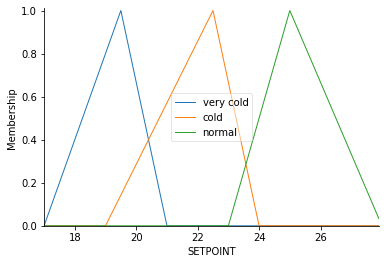

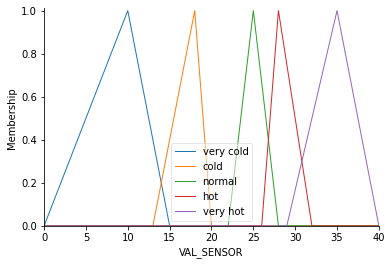

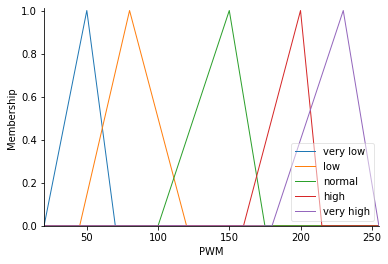

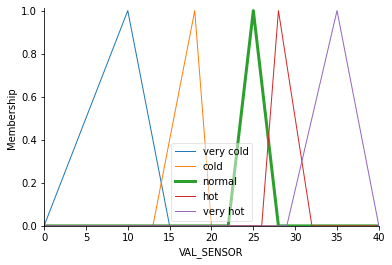

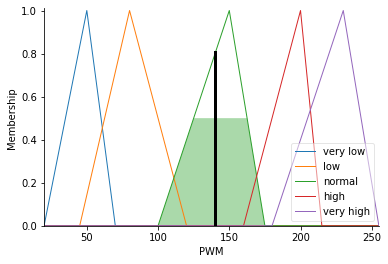

In [13]:
#điều khiển tốc độ động cơ DC
import numpy as np
import skfuzzy as fuzz
from  skfuzzy import control as ctrl

SETPOINT = ctrl.Antecedent(np.arange(17,28,0.1),'SETPOINT')
VAL_SENSOR = ctrl.Antecedent(np.arange(0,41,1),'VAL_SENSOR')
PWM = ctrl.Consequent(np.arange(20,256,5),'PWM')

SETPOINT['very cold']=fuzz.trimf(SETPOINT.universe,[17,19.5,21])
SETPOINT['cold']=fuzz.trimf(SETPOINT.universe,[19,22.5,24])
SETPOINT['normal']=fuzz.trimf(SETPOINT.universe,[23,25,28])

VAL_SENSOR['very cold']=fuzz.trimf(VAL_SENSOR.universe,[0,10,15])
VAL_SENSOR['cold']=fuzz.trimf(VAL_SENSOR.universe,[13,18,20])
VAL_SENSOR['normal']=fuzz.trimf(VAL_SENSOR.universe,[22,25,28])
VAL_SENSOR['hot']=fuzz.trimf(VAL_SENSOR.universe,[26,28,32])
VAL_SENSOR['very hot']=fuzz.trimf(VAL_SENSOR.universe,[29,35,40])
1
PWM['very low']=fuzz.trimf(PWM.universe,[20,50,70])
PWM['low']=fuzz.trimf(PWM.universe,[45,80,120])
PWM['normal']=fuzz.trimf(PWM.universe,[100,150,175])
PWM['high']=fuzz.trimf(PWM.universe,[160,200,215])
PWM['very high']=fuzz.trimf(PWM.universe,[180,230,255])

SETPOINT.view()
VAL_SENSOR.view()
PWM.view()
VAL_SENSOR['normal'].view()

rule1=ctrl.Rule(SETPOINT['very cold'] & VAL_SENSOR['very cold'], PWM['very low'])
rule2=ctrl.Rule(SETPOINT['very cold'] & VAL_SENSOR['cold'], PWM['low'])
rule3=ctrl.Rule(SETPOINT['very cold'] & VAL_SENSOR['normal'], PWM['high'])
rule4=ctrl.Rule(SETPOINT['very cold'] & VAL_SENSOR['hot'], PWM['high'])
rule5=ctrl.Rule(SETPOINT['very cold'] & VAL_SENSOR['very hot'], PWM['very high'])

rule6=ctrl.Rule(SETPOINT['cold'] & VAL_SENSOR['very cold'], PWM['low'])
rule7=ctrl.Rule(SETPOINT['cold'] & VAL_SENSOR['cold'], PWM['very low'])
rule8=ctrl.Rule(SETPOINT['cold'] & VAL_SENSOR['normal'], PWM['normal'])
rule9=ctrl.Rule(SETPOINT['cold'] & VAL_SENSOR['hot'], PWM['high'])
rule10=ctrl.Rule(SETPOINT['cold'] & VAL_SENSOR['very hot'], PWM['very high'])

rule11=ctrl.Rule(SETPOINT['normal'] & VAL_SENSOR['very cold'], PWM['very high'])
rule12=ctrl.Rule(SETPOINT['normal'] & VAL_SENSOR['cold'], PWM['normal'])
rule13=ctrl.Rule(SETPOINT['normal'] & VAL_SENSOR['normal'], PWM['normal'])
rule14=ctrl.Rule(SETPOINT['normal'] & VAL_SENSOR['hot'], PWM['high'])
rule15=ctrl.Rule(SETPOINT['normal'] & VAL_SENSOR['very hot'], PWM['very high'])

PWM_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pwm = ctrl.ControlSystemSimulation(PWM_ctrl)
pwm.input['SETPOINT']=24
pwm.input['VAL_SENSOR'] = 26
pwm.compute()
print(pwm.output['PWM'])
PWM.view(sim=pwm)
